# Importing Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder,StandardScaler
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from imblearn.over_sampling import SMOTE

# Loading Datasets

In [12]:

haberman = pd.read_csv('haberman.csv')
haberman.columns = ['Age','Year','Node','Survival']

haberman.head()

,Age,Year,Node,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [13]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       305 non-null    int64
 1   Year      305 non-null    int64
 2   Node      305 non-null    int64
 3   Survival  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [14]:
haberman.isnull().sum()

Age         0
Year        0
Node        0
Survival    0
dtype: int64

In [15]:
haberman.corr()

,Age,Year,Node,Survival
Age,1.000000,0.092623,-0.066548,0.064351
Year,0.092623,1.000000,-0.003277,-0.004076
Node,-0.066548,-0.003277,1.000000,0.286191
Survival,0.064351,-0.004076,0.286191,1.000000


In [16]:
haberman['Survival'].value_counts()

Survival
1    224
2     81
Name: count, dtype: int64

In [17]:
X = haberman.drop('Survival',axis=1)
Y = haberman['Survival']

print(f'Shape of X index 0 : {X.shape[0]}')
print(f'Shape of X index 1 : {X.shape[1]}')
print(f'Shape of Y : {Y.shape[0]}')


Shape of X index 0 : 305
Shape of X index 1 : 3
Shape of Y : 305


In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(244, 3) (61, 3) (244,) (61,)


In [19]:

logistic = LogisticRegression(
    multi_class='multinomial',                
    max_iter=200,                
    random_state=0            
)


logistic.fit(X_train, Y_train)

X_train_pred = logistic.predict(X_train)
X_test_pred = logistic.predict(X_test)

train_accuracy = accuracy_score(Y_train, X_train_pred)
test_accuracy = accuracy_score(Y_test, X_test_pred)

print(f"Train Accuracy: {train_accuracy:}")
print(f"Test Accuracy: {test_accuracy:}")



Train Accuracy: 0.7540983606557377
Test Accuracy: 0.7377049180327869


c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:

print("Classification Report - Training Set:")
print(classification_report(Y_train, X_train_pred,target_names=['Alive','Dead']))

print("Classification Report - Testing Set:")
print(classification_report(Y_test, X_test_pred,target_names=['Alive','Dead']))


Classification Report - Training Set:
              precision    recall  f1-score   support

        Dead       0.76      0.96      0.85       179
       Alive       0.63      0.18      0.29        65

    accuracy                           0.75       244
   macro avg       0.70      0.57      0.57       244
weighted avg       0.73      0.75      0.70       244

Classification Report - Testing Set:
              precision    recall  f1-score   support

        Dead       0.76      0.93      0.84        45
       Alive       0.50      0.19      0.27        16

    accuracy                           0.74        61
   macro avg       0.63      0.56      0.56        61
weighted avg       0.69      0.74      0.69        61



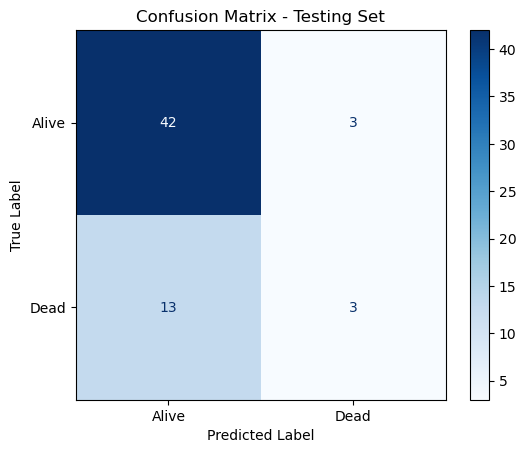

In [30]:

conf_mat = confusion_matrix(Y_test, X_test_pred)
Matrix = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Alive','Dead'])
Matrix.plot(cmap=plt.cm.Blues, values_format='d')  
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [31]:

param = {
    'C': [0.01, 0.1, 1, 10, 100],        
    'penalty': ['l2'],                    
    'solver': ['lbfgs', 'saga'],          
    'max_iter': [100, 200, 300]         
}



In [32]:

grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=0),
    param_grid=param,
    cv=5,                       
    scoring='accuracy',
    n_jobs=-1,                  
    verbose=2                   
)


grid_search.fit(X_train, Y_train)



Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'saga']},
             scoring='accuracy', verbose=2)

In [33]:
print(f"Best Parameters from GridSearchCV: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:}")


Best Parameters from GridSearchCV: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.7540816326530612


In [34]:

best_log_reg = grid_search.best_estimator_

X_train_pred_best = best_log_reg.predict(X_train)
train_accuracy_best = accuracy_score(Y_train, X_train_pred_best)
print(f"Train Accuracy with Best Parameters: {train_accuracy_best:.4f}")



Train Accuracy with Best Parameters: 0.7541


In [35]:
X_test_pred_best = best_log_reg.predict(X_test)
test_accuracy_best = accuracy_score(Y_test, X_test_pred_best)
print(f"Test Accuracy with Best Parameters: {test_accuracy_best:.4f}")


Test Accuracy with Best Parameters: 0.7377


In [36]:

print("Classification Report - Training Set (Best Estimator):")
print(classification_report(Y_train, X_train_pred_best, target_names=['Alive','Dead']))

print("Classification Report - Testing Set (Best Estimator):")
print(classification_report(Y_test, X_test_pred_best, target_names=['Alive','Dead']))

Classification Report - Training Set (Best Estimator):
              precision    recall  f1-score   support

       Alive       0.76      0.96      0.85       179
        Dead       0.63      0.18      0.29        65

    accuracy                           0.75       244
   macro avg       0.70      0.57      0.57       244
weighted avg       0.73      0.75      0.70       244

Classification Report - Testing Set (Best Estimator):
              precision    recall  f1-score   support

       Alive       0.76      0.93      0.84        45
        Dead       0.50      0.19      0.27        16

    accuracy                           0.74        61
   macro avg       0.63      0.56      0.56        61
weighted avg       0.69      0.74      0.69        61



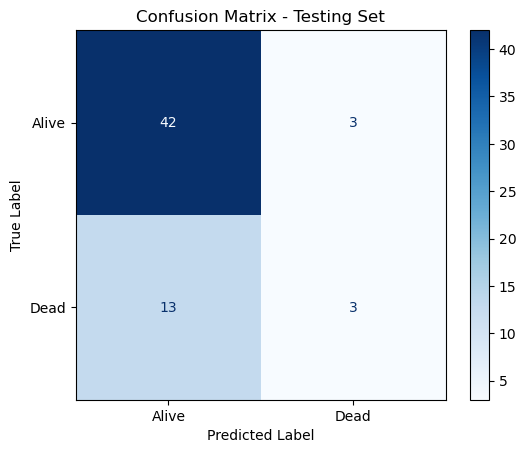

In [37]:

conf_mat = confusion_matrix(Y_test, X_test_pred_best)
Matrix = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Alive','Dead'])
Matrix.plot(cmap=plt.cm.Blues, values_format='d')  
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [39]:

smote = SMOTE(random_state=0)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

print("Class distribution after SMOTE:")
print(Y_train_smote.value_counts())


best_log_reg.fit(X_train_smote, Y_train_smote)

X_test_pred = best_log_reg.predict(X_test)

accuracy = accuracy_score(Y_test, X_test_pred)
classification_report_result = classification_report(Y_test, X_test_pred)
confusion_matrix_result = confusion_matrix(Y_test, X_test_pred)

print("Accuracy on Test Data:", accuracy)
print("Classification Report:", classification_report_result)
print("Confusion Matrix:", confusion_matrix_result)


Class distribution after SMOTE:
Survival
1    179
2    179
Name: count, dtype: int64
Accuracy on Test Data: 0.7377049180327869
Classification Report:               precision    recall  f1-score   support

           1       0.84      0.80      0.82        45
           2       0.50      0.56      0.53        16

    accuracy                           0.74        61
   macro avg       0.67      0.68      0.67        61
weighted avg       0.75      0.74      0.74        61

Confusion Matrix: [[36  9]
 [ 7  9]]
